<a href="https://colab.research.google.com/github/okanars/DiabetesPredictionKNN/blob/main/DiabetesPredictionwithKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")


In [54]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



*   Outcome 1 means: Person has diabetes

*   Outcome 0 means: Person has not diabetes




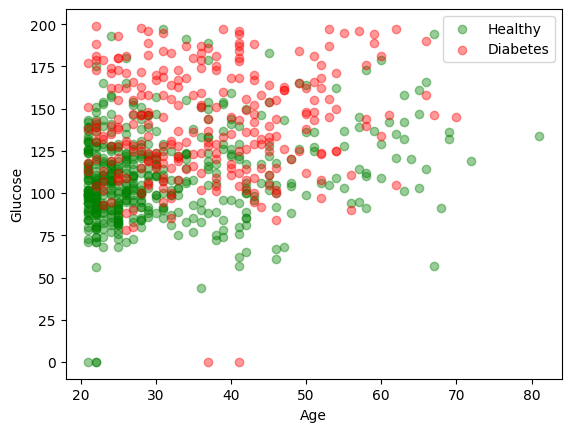

In [55]:
seker_hastalari = data[data.Outcome ==1]
saglikli = data[data.Outcome == 0]
#We'll have a chart which is about glucose and age
plt.scatter(saglikli.Age,saglikli.Glucose,color="green",label="Healthy",alpha=0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="Diabetes",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

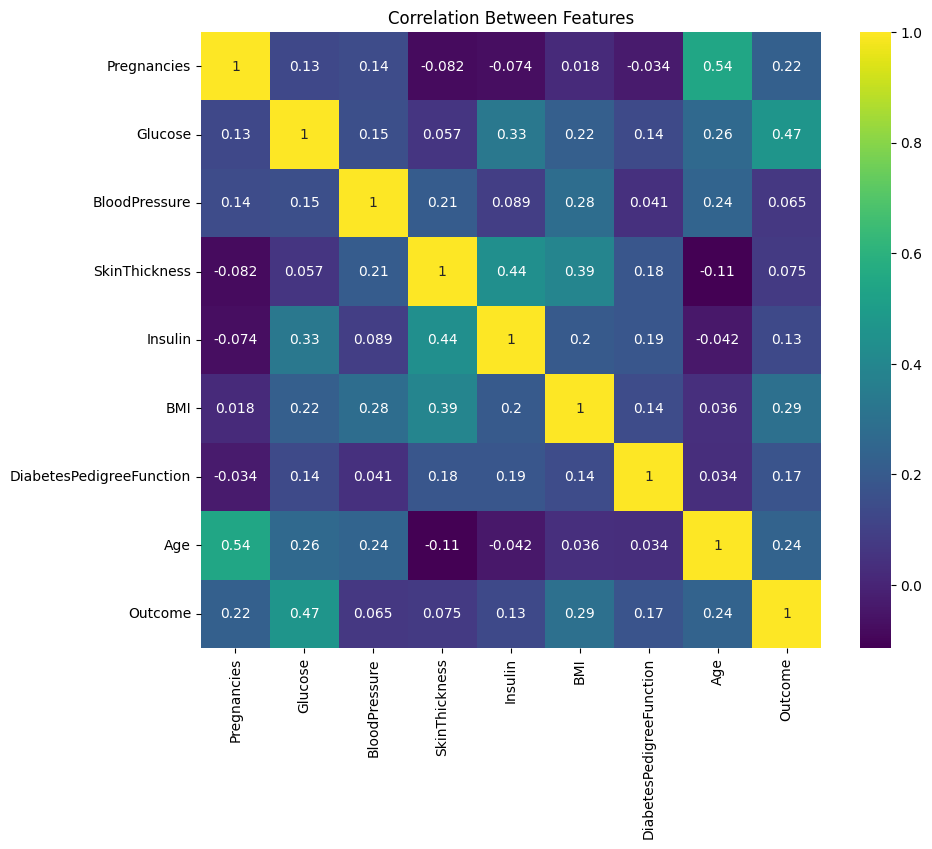

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Between Features')
plt.show()

Now we are searching x and y axis
We have to drop Outcome column which is dependent variable. We'll look only the independent variables

In [61]:

#KNN Alg. makes classification on x values
y = data.Outcome.values
x_ham = data.drop(["Outcome"],axis=1)

# MinMaxScaler'ı ham veri üzerine uygulayın
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x_ham)


#firstly
print("Raw Data Before Normalization:\n")
print(x_ham.head())
#then
# x_normalized dizisini Pandas DataFrame'e dönüştürün
x_normalized_df = pd.DataFrame(x_normalized, columns=x_ham.columns)

# sonra
print("\n\nAfter Normalization:\n")
print(x_normalized_df.head())


Raw Data Before Normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


After Normalization:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0

In [48]:
# Divide the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=1)

# Create the KNN model
KNN = KNeighborsClassifier(n_neighbors=3)

# Train the model with training data
KNN.fit(x_train, y_train)

# Check the accuracy of training data
train_accuracy = KNN.score(x_train, y_train)
print(f"Train Accuracy: {train_accuracy}")

# Check the accuracy of test data
test_accuracy = KNN.score(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.8387622149837134
Test Accuracy: 0.7857142857142857


In [49]:
#for the best K Value
counter = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train,y_train)
    print("if n_neighbors = ",counter," ","Accuracy Rate: %",knn_new.score(x_test,y_test)*100)
    counter +=1

if n_neighbors =  1   Accuracy Rate: % 69.48051948051948
if n_neighbors =  2   Accuracy Rate: % 74.02597402597402
if n_neighbors =  3   Accuracy Rate: % 78.57142857142857
if n_neighbors =  4   Accuracy Rate: % 75.97402597402598
if n_neighbors =  5   Accuracy Rate: % 79.87012987012987
if n_neighbors =  6   Accuracy Rate: % 79.22077922077922
if n_neighbors =  7   Accuracy Rate: % 81.16883116883116
if n_neighbors =  8   Accuracy Rate: % 79.22077922077922
if n_neighbors =  9   Accuracy Rate: % 78.57142857142857
if n_neighbors =  10   Accuracy Rate: % 79.22077922077922


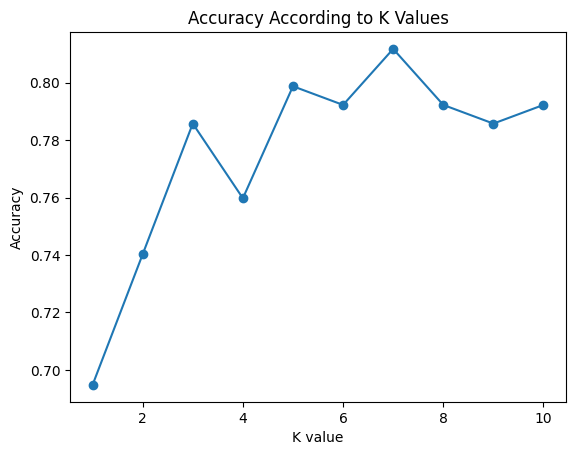

In [59]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(x_train, y_train)
    accuracies.append(knn_new.score(x_test, y_test))

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy According to K Values')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()


# **Diabetes Expectation on Sample Data**

In [51]:
# Data on new patients
new_patients = pd.DataFrame([
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [2, 100, 60, 20, 0, 30.0, 0.5, 25],
    [4, 120, 65, 25, 0, 32.0, 0.6, 30]
], columns=x_ham.columns)

# Convert new patients' data with the same scaler
new_patients_normalized = scaler.transform(new_patients)

# Estimate for each patient
new_predictions = KNN.predict(new_patients_normalized)

# Print prediction results
for i, prediction in enumerate(new_predictions):
    print(f"Patient {i + 1}: {'Diabetes' if prediction == 1 else 'Healthy'}")

Patient 1: Diabetes
Patient 2: Healthy
Patient 3: Diabetes
